In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("/Users/admin/Documents/Kaggle/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.groupby('area_type')['area_type'].agg('count') # we will get count of each type

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df2=df1.drop(['area_type'],axis='columns')

In [5]:
df2

,availability,location,size,society,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [6]:
df2=df1.drop(['area_type','availability','balcony','society'],axis='columns')

In [7]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
df2.isnull().sum() #the number fo rows the paticular column value is NA

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

We can actually drop these values or we can do one more thing if we take bath which has 73 NA values so we can take median of the remaining values and fill that NA values of bath with median of bath.

In [9]:
df3 = df2.dropna()

In [10]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [11]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 5)

In [13]:
df1.shape

(13320, 9)

In [14]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

/var/folders/1f/4q55ynjn0236lj7w94z0ntcc0000gn/T/ipykernel_3581/2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [17]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [18]:
df3[df3.bhk>10]

,location,size,total_sqft,bath,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [19]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
df3.total_sqft.dtype

dtype('O')

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [23]:
def convert_sqft_to_string(x):
    l=list(x.split('-'))
    if len(l)==2:
        return (float(l[0])+float(l[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
convert_sqft_to_string('2830 - 2882')

2856.0

In [25]:
convert_sqft_to_string('yuk')

In [26]:
convert_sqft_to_string('5678')

5678.0

In [27]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_string)

In [28]:
df4.head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [29]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [30]:
df5=df4.copy()

In [31]:
df5['price_per_sqft']=(df4['price']*100000)/df4['total_sqft']
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [32]:
len(df5.location.unique())

1304

In [33]:
df5['location']=df5.location.apply(lambda x: x.strip())

In [34]:
loc_stat=df5.groupby('location')['location'].agg('count')
loc_stat

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [35]:
loc_stat.dtype

dtype('int64')

In [36]:
max(loc_stat)

535

In [37]:
loc_stat.sort_values(ascending=False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [38]:
loc_stat=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [39]:
loc_stat[loc_stat>100]

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Name: location, dtype: int64

In [40]:
loc_stat[loc_stat==414]

Series([], Name: location, dtype: int64)

In [41]:
loc_stat[loc_stat>=100]

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Name: location, dtype: int64

In [42]:
loc_stat_lt_10=loc_stat[loc_stat<10]

In [43]:
len(df5.location.unique())

1293

In [44]:
df5.location=df5.location.apply(lambda x: 'other' if x in loc_stat_lt_10 else x)

In [45]:
len(df5.location.unique())

255

In [46]:
df5[df5.location!='other']

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [47]:
len(df5[df5.location!='other'])

10495

In [48]:
df4.shape

(13246, 6)

In [49]:
df5[df5.total_sqft/df5.bhk < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [50]:
df6=df5[~(df5.total_sqft/df5.bhk < 300)]

In [51]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [52]:
df5.shape

(13246, 7)

In [53]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [54]:
pd

<module 'pandas' from '/usr/local/anaconda3/lib/python3.9/site-packages/pandas/__init__.py'>

In [55]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for k,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        red_df=subdf[(df.price_per_sqft<=(m+sd)) & (df.price_per_sqft>(m-sd))]
        df_out=pd.concat([df_out,red_df],ignore_index=True)
    return df_out

In [56]:
df7=remove_outliers(df6)
df7

/var/folders/1f/4q55ynjn0236lj7w94z0ntcc0000gn/T/ipykernel_3581/606997754.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  red_df=subdf[(df.price_per_sqft<=(m+sd)) & (df.price_per_sqft>(m-sd))]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10217,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10218,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10219,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10220,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [57]:
 bhk2 = df7[(df7.location=='1st Phase JP Nagar') & (df7.bhk==2)]
bhk2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
18,1st Phase JP Nagar,2 BHK,1394.0,2.0,100.0,2,7173.601148
19,1st Phase JP Nagar,2 BHK,1077.0,2.0,93.0,2,8635.097493
20,1st Phase JP Nagar,2 Bedroom,1566.0,2.0,180.0,2,11494.252874
24,1st Phase JP Nagar,2 BHK,1180.0,2.0,88.5,2,7500.000000
25,1st Phase JP Nagar,2 BHK,1200.0,2.0,86.0,2,7166.666667
26,1st Phase JP Nagar,2 BHK,1394.0,2.0,85.0,2,6097.560976
29,1st Phase JP Nagar,2 BHK,1205.0,2.0,85.0,2,7053.941909
31,1st Phase JP Nagar,2 BHK,900.0,2.0,75.0,2,8333.333333


In [58]:
def scatter_plot(df,loc):
    b2=df[(df.location==loc) & (df.bhk==2)]
    b3=df[(df.location==loc) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(b2.total_sqft,b2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(b3.total_sqft,b3.price_per_sqft,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per square feet")
    plt.title("LOCATION")
    plt.legend()


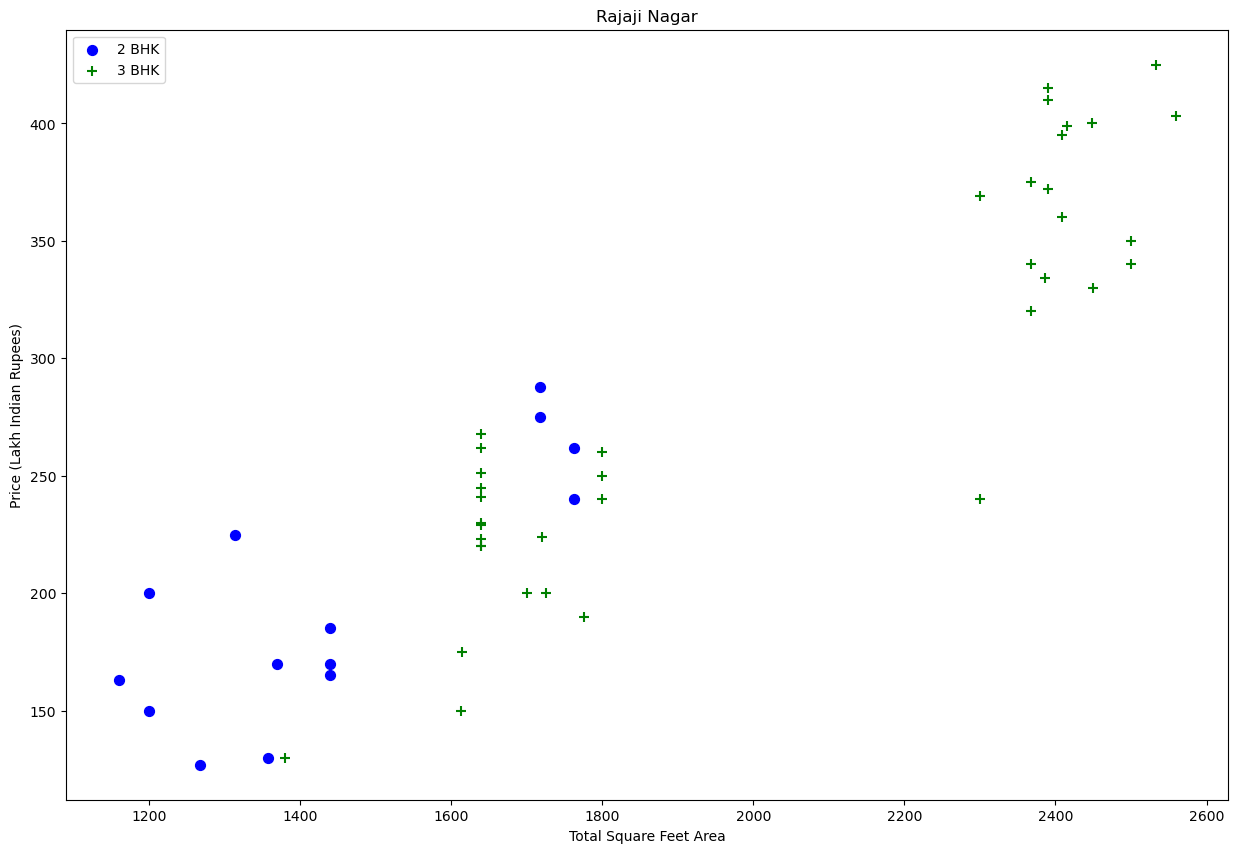

In [59]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [60]:
for k,subdf in df7.groupby('location'):
    print("Location is",k,'\n',subdf)

Location is 1st Block Jayanagar 
               location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163
Location is 1st Block Koramangala 
                  location   size  total_sqft  bath  price  bhk  price_per_sqft
7   1st Block Koramangala  2 BHK      1415.0   2.0  110.0    2     7773.851590
8   1st Block Koramangala  2 BHK       860.0   2.0   65.5    2     7616.279070
9   1st Block Koramangala  4 BHK      3000.0   3.0  300.0    4    10000.000000
10  1s

           location       size  total_sqft  bath  price  bhk  price_per_sqft
1376  Bommenahalli  3 Bedroom      1200.0   3.0  125.0    3    10416.666667
1377  Bommenahalli  4 Bedroom      1632.0   3.0  145.0    4     8884.803922
1378  Bommenahalli  4 Bedroom      1670.0   3.0  135.0    4     8083.832335
1379  Bommenahalli  4 Bedroom      1680.0   3.0  135.0    4     8035.714286
1380  Bommenahalli  4 Bedroom      1632.0   3.0  128.0    4     7843.137255
1381  Bommenahalli  3 Bedroom      3339.0   3.0  250.0    3     7487.271638
1382  Bommenahalli  4 Bedroom      1355.0   3.0  135.0    4     9963.099631
1383  Bommenahalli  3 Bedroom      1232.0   3.0   96.0    3     7792.207792
1384  Bommenahalli  4 Bedroom      1632.0   3.0  140.0    4     8578.431373
Location is Brookefield 
          location       size  total_sqft  bath  price  bhk  price_per_sqft
1385  Brookefield      2 BHK      1150.0   2.0   69.0    2     6000.000000
1386  Brookefield      2 BHK      1142.0   2.0   70.0    2     

              location   size  total_sqft  bath   price  bhk  price_per_sqft
1925  Electronic City  2 BHK       660.0   1.0   23.10    2     3500.000000
1926  Electronic City  3 BHK      1025.0   2.0   47.00    3     4585.365854
1927  Electronic City  2 BHK      1000.0   2.0   28.88    2     2888.000000
1928  Electronic City  3 BHK      1530.0   2.0   45.90    3     3000.000000
1929  Electronic City  3 BHK      1500.0   2.0   64.50    3     4300.000000
...               ...    ...         ...   ...     ...  ...             ...
2199  Electronic City  4 BHK      2093.0   4.0  134.00    4     6402.293359
2200  Electronic City  2 BHK       750.0   2.0   19.50    2     2600.000000
2201  Electronic City  2 BHK      1355.0   2.0   73.00    2     5387.453875
2202  Electronic City  3 BHK      1360.0   2.0   64.99    3     4778.676471
2203  Electronic City  2 BHK      1060.0   2.0   52.00    2     4905.660377

[279 rows x 7 columns]
Location is Electronic City Phase II 
                       lo

      location   size  total_sqft  bath  price  bhk  price_per_sqft
2834   Hebbal  3 BHK      1760.0   2.0  123.0    3     6988.636364
2835   Hebbal  4 BHK      5611.5   4.0  477.0    4     8500.400962
2836   Hebbal  3 BHK      1900.0   3.0  119.0    3     6263.157895
2837   Hebbal  2 BHK      1349.0   2.0   98.2    2     7279.466271
2838   Hebbal  4 BHK      2483.0   5.0  212.0    4     8538.058800
...       ...    ...         ...   ...    ...  ...             ...
2959   Hebbal  3 BHK      1662.0   3.0  155.0    3     9326.113117
2960   Hebbal  3 BHK      2250.0   3.0  219.0    3     9733.333333
2961   Hebbal  2 BHK      1349.0   2.0   98.0    2     7264.640474
2962   Hebbal  4 BHK      4000.0   6.0  370.0    4     9250.000000
2963   Hebbal  2 BHK      1349.0   2.0   96.8    2     7175.685693

[130 rows x 7 columns]
Location is Hebbal Kempapura 
               location       size  total_sqft  bath  price  bhk  \
2964  Hebbal Kempapura      3 BHK      1700.0   3.0  155.0    3   
2965  

            location       size  total_sqft  bath   price  bhk  price_per_sqft
3884  Kaggadasapura      3 BHK      1280.0   2.0   56.00    3     4375.000000
3885  Kaggadasapura      2 BHK      1275.0   2.0   52.00    2     4078.431373
3886  Kaggadasapura      4 BHK      2150.0   4.0  100.00    4     4651.162791
3887  Kaggadasapura      2 BHK      1150.0   2.0   42.00    2     3652.173913
3888  Kaggadasapura      2 BHK      1110.0   2.0   53.00    2     4774.774775
3889  Kaggadasapura      2 BHK      1060.0   2.0   48.00    2     4528.301887
3890  Kaggadasapura      3 BHK      1350.0   3.0   55.50    3     4111.111111
3891  Kaggadasapura      2 BHK      1063.0   2.0   42.00    2     3951.081844
3892  Kaggadasapura      3 BHK      1470.0   2.0   75.00    3     5102.040816
3893  Kaggadasapura      3 BHK      1615.0   3.0   58.00    3     3591.331269
3894  Kaggadasapura      2 BHK      1050.0   2.0   48.00    2     4571.428571
3895  Kaggadasapura      2 BHK      1132.0   2.0   42.00    2  

               location   size  total_sqft  bath  price  bhk  price_per_sqft
4822  LB Shastri Nagar  3 BHK      1600.0   3.0   65.0    3     4062.500000
4823  LB Shastri Nagar  2 BHK      1043.0   2.0   55.0    2     5273.250240
4824  LB Shastri Nagar  2 BHK      1184.0   2.0   69.0    2     5827.702703
4825  LB Shastri Nagar  1 BHK       665.0   1.0   32.0    1     4812.030075
4826  LB Shastri Nagar  2 BHK      1250.0   2.0   48.5    2     3880.000000
4827  LB Shastri Nagar  3 BHK      1400.0   2.0   80.0    3     5714.285714
4828  LB Shastri Nagar  2 BHK      1184.0   2.0   62.0    2     5236.486486
4829  LB Shastri Nagar  2 BHK      1200.0   2.0   47.0    2     3916.666667
4830  LB Shastri Nagar  2 BHK      1200.0   2.0   75.0    2     6250.000000
4831  LB Shastri Nagar  2 BHK      1000.0   2.0   49.5    2     4950.000000
Location is Laggere 
      location       size  total_sqft  bath  price  bhk  price_per_sqft
4832  Laggere  5 Bedroom      2800.0   5.0  125.0    5     4464.285714

           location   size  total_sqft  bath   price  bhk  price_per_sqft
5328  Narayanapura  2 BHK      1308.0   2.0   89.04    2     6807.339450
5329  Narayanapura  3 BHK      1566.0   3.0   83.30    3     5319.284802
5330  Narayanapura  3 BHK      1485.0   3.0   85.00    3     5723.905724
5331  Narayanapura  2 BHK      1302.0   2.0   69.10    2     5307.219662
5332  Narayanapura  2 BHK      1308.0   2.0   89.04    2     6807.339450
5333  Narayanapura  3 BHK      2357.0   3.0  135.00    3     5727.619856
5334  Narayanapura  3 BHK      2357.0   3.0  135.00    3     5727.619856
5335  Narayanapura  2 BHK      1469.0   2.0   99.14    2     6748.808713
Location is Neeladri Nagar 
             location    size  total_sqft  bath  price  bhk  price_per_sqft
5336  Neeladri Nagar   2 BHK      1053.0   2.0   45.0    2     4273.504274
5337  Neeladri Nagar   2 BHK      1363.0   2.0   68.0    2     4988.994864
5338  Neeladri Nagar   3 BHK      2556.0   3.0  133.0    3     5203.442879
5339  Neeladr

                 location   size  total_sqft  bath  price  bhk  price_per_sqft
5528  Pattandur Agrahara  3 BHK      1550.0   2.0  80.00    3     5161.290323
5529  Pattandur Agrahara  2 BHK      1025.0   2.0  44.50    2     4341.463415
5530  Pattandur Agrahara  2 BHK      1247.0   2.0  59.80    2     4795.509222
5531  Pattandur Agrahara  2 BHK       900.0   2.0  42.00    2     4666.666667
5532  Pattandur Agrahara  2 BHK      1302.0   2.0  66.00    2     5069.124424
5533  Pattandur Agrahara  3 BHK      1550.0   2.0  80.00    3     5161.290323
5534  Pattandur Agrahara  2 BHK      1247.0   2.0  62.35    2     5000.000000
5535  Pattandur Agrahara  2 BHK      1350.0   2.0  68.00    2     5037.037037
Location is Poorna Pragna Layout 
                   location   size  total_sqft  bath  price  bhk  \
5536  Poorna Pragna Layout  2 BHK       920.0   2.0  39.55    2   
5537  Poorna Pragna Layout  3 BHK      1475.0   2.0  58.99    3   
5538  Poorna Pragna Layout  3 BHK      1270.0   2.0  50.79   

               location       size  total_sqft  bath   price  bhk  \
5920  Ramamurthy Nagar  4 Bedroom      3700.0   4.0  225.00    4   
5921  Ramamurthy Nagar  5 Bedroom      3500.0   5.0  150.00    5   
5922  Ramamurthy Nagar      2 BHK      1050.0   2.0   37.00    2   
5923  Ramamurthy Nagar      2 BHK      1040.0   2.0   50.00    2   
5924  Ramamurthy Nagar  3 Bedroom      1600.0   3.0   75.00    3   
5925  Ramamurthy Nagar  2 Bedroom      1200.0   3.0   72.00    2   
5926  Ramamurthy Nagar      1 BHK       360.0   1.0   26.00    1   
5927  Ramamurthy Nagar      2 BHK       950.0   2.0   50.79    2   
5928  Ramamurthy Nagar  3 Bedroom      1200.0   2.0   66.00    3   
5929  Ramamurthy Nagar      3 BHK      1525.0   3.0  100.00    3   
5930  Ramamurthy Nagar  2 Bedroom      1200.0   2.0   80.00    2   
5931  Ramamurthy Nagar      2 BHK      1200.0   2.0   42.00    2   
5932  Ramamurthy Nagar      3 BHK      1515.0   3.0   65.00    3   
5933  Ramamurthy Nagar  2 Bedroom      1100.0  

                  location       size  total_sqft  bath  price  bhk  \
6426  Sector 1 HSR Layout      3 BHK      1840.0   3.0  155.0    3   
6427  Sector 1 HSR Layout      3 BHK      1533.0   3.0  150.0    3   
6428  Sector 1 HSR Layout  2 Bedroom       600.0   2.0  120.0    2   
6429  Sector 1 HSR Layout      1 BHK      6000.0   1.0  276.0    1   
6430  Sector 1 HSR Layout      3 BHK      1804.0   3.0  150.0    3   
6431  Sector 1 HSR Layout      3 BHK      1720.0   3.0   83.0    3   
6432  Sector 1 HSR Layout      3 BHK      1684.0   3.0   86.0    3   

      price_per_sqft  
6426     8423.913043  
6427     9784.735812  
6428    20000.000000  
6429     4600.000000  
6430     8314.855876  
6431     4825.581395  
6432     5106.888361  
Location is Sector 2 HSR Layout 
                  location   size  total_sqft  bath  price  bhk  price_per_sqft
6433  Sector 2 HSR Layout  2 BHK      1296.0   2.0   75.0    2     5787.037037
6434  Sector 2 HSR Layout  1 BHK       794.0   1.0   60.0    1

           location       size  total_sqft  bath   price  bhk  price_per_sqft
6853  Thubarahalli  4 Bedroom      3800.0   4.0  239.00    4     6289.473684
6854  Thubarahalli      2 BHK      1200.0   2.0   78.00    2     6500.000000
6855  Thubarahalli      2 BHK      1128.0   2.0   75.00    2     6648.936170
6856  Thubarahalli      2 BHK      1185.0   2.0   65.00    2     5485.232068
6857  Thubarahalli      2 BHK       975.0   2.0   55.00    2     5641.025641
6858  Thubarahalli      2 BHK      1330.0   2.0   75.00    2     5639.097744
6859  Thubarahalli      2 BHK      1085.0   2.0   70.00    2     6451.612903
6860  Thubarahalli      2 BHK      1216.0   2.0   80.00    2     6578.947368
6861  Thubarahalli      2 BHK      1200.0   2.0   79.00    2     6583.333333
6862  Thubarahalli      2 BHK      1200.0   2.0   80.00    2     6666.666667
6863  Thubarahalli      2 BHK      1200.0   2.0   79.55    2     6629.166667
6864  Thubarahalli      3 BHK      1540.0   3.0   90.00    3     5844.15584

        location   size  total_sqft  bath  price  bhk  price_per_sqft
7740  Yelahanka  3 BHK      1600.0   2.0  75.00    3     4687.500000
7741  Yelahanka  2 BHK      1326.0   2.0  78.00    2     5882.352941
7742  Yelahanka  3 BHK      1282.0   2.0  48.70    3     3798.751950
7743  Yelahanka  2 BHK      1350.0   2.0  55.55    2     4114.814815
7744  Yelahanka  2 BHK      1035.0   2.0  45.00    2     4347.826087
...         ...    ...         ...   ...    ...  ...             ...
7904  Yelahanka  3 BHK      1282.0   2.0  48.72    3     3800.312012
7905  Yelahanka  2 BHK      1180.0   2.0  55.00    2     4661.016949
7906  Yelahanka  2 BHK      1267.0   3.0  78.00    2     6156.274665
7907  Yelahanka  2 BHK      1360.0   2.0  78.19    2     5749.264706
7908  Yelahanka  2 BHK      1025.0   2.0  44.00    2     4292.682927

[169 rows x 7 columns]
Location is Yelahanka New Town 
                 location       size  total_sqft  bath  price  bhk  \
7909  Yelahanka New Town      1 BHK       650

In [61]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for loc,locdf in df.groupby('location'):
        bhk_stats={}
        for bhk,bhkdf in locdf.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhkdf.price_per_sqft),
                'std': np.std(bhkdf.price_per_sqft),
                'count': bhkdf.shape[0]
            }
        for bhk,bhkdf in locdf.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
            #exclude_indices=np.append(exclude_indices,bhkdf[bhkdf.price_per_sqft<(stats['mean'])].index.values)
                exclude_indices = np.append(exclude_indices, bhkdf[bhkdf.price_per_sqft<(stats['mean'])].index.values)


    return df.drop(exclude_indices,axis='index')
        
df8=remove_bhk_outliers(df7)
df8.shape
            

(7369, 7)

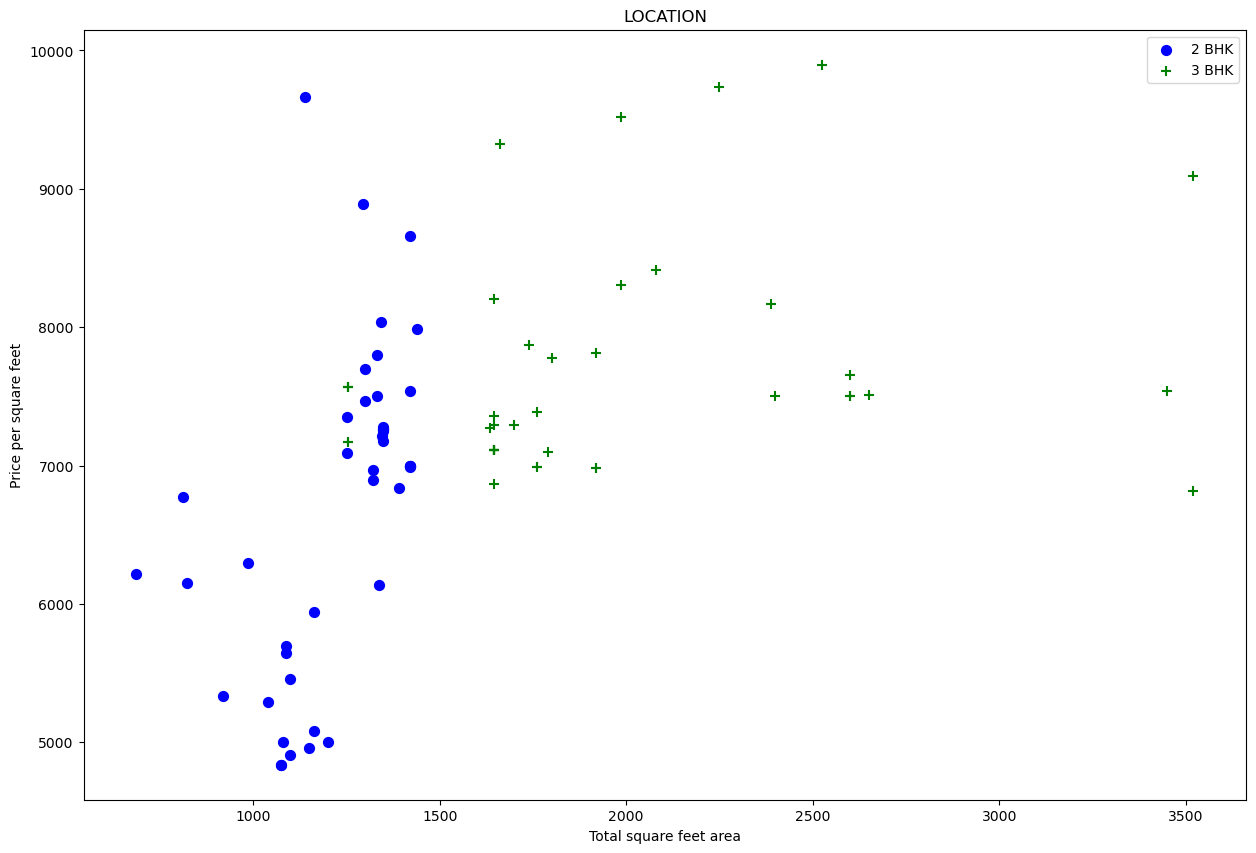

In [62]:
scatter_plot(df8,'Hebbal')

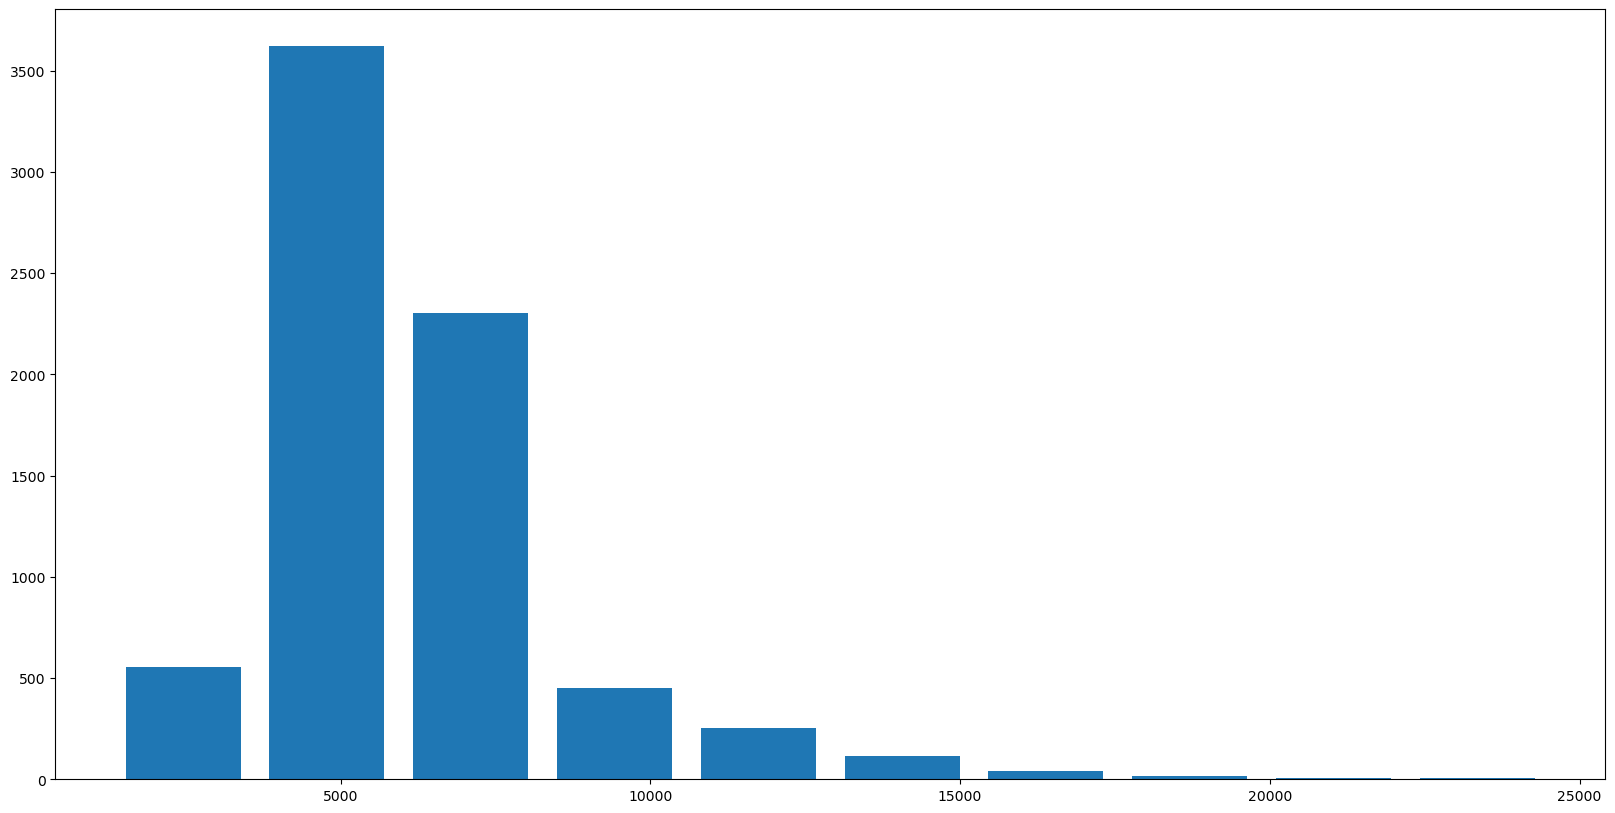

In [63]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel="Price per square foot"
plt.ylabel="Count"

In [64]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [65]:
df8[df8.bath>=9]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
3816,KR Puram,9 BHK,4600.0,9.0,200.0,9,4347.826087
5161,Mico Layout,9 BHK,5000.0,9.0,210.0,9,4200.000000
5344,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5727,Raja Rajeshwari Nagar,9 Bedroom,3600.0,9.0,240.0,9,6666.666667
8105,other,11 BHK,5000.0,9.0,360.0,11,7200.000000
8476,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8547,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8633,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
8812,other,9 BHK,4500.0,9.0,500.0,9,11111.111111


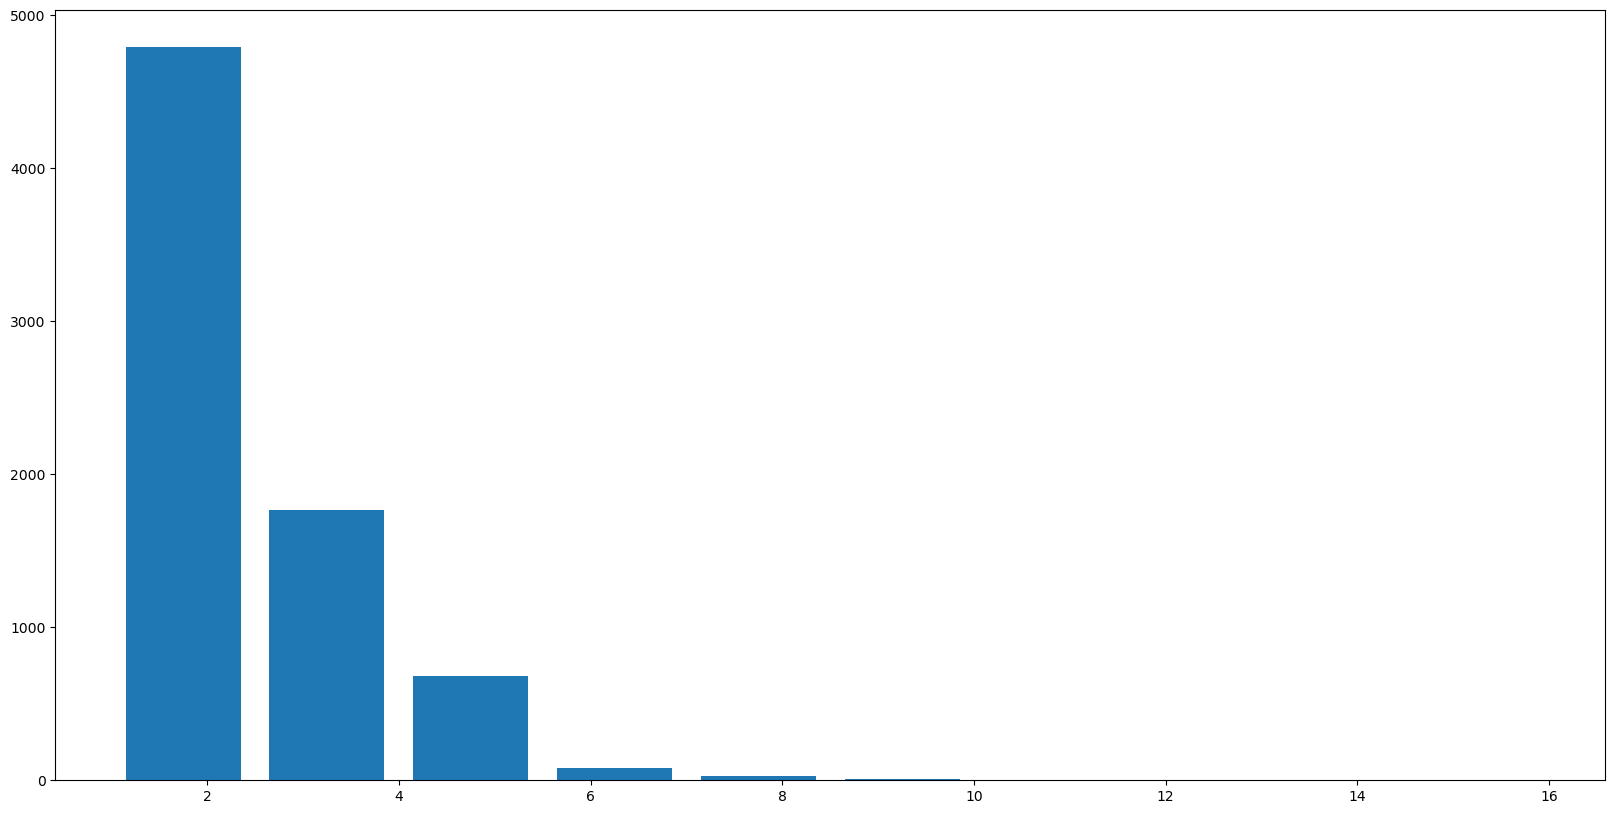

In [66]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel="No of Bathrooms"
plt.ylabel="Count"

In [67]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6792,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8476,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [68]:
df9=df8[df8.bath<=df8.bhk+2]

In [69]:
df9.shape

(7364, 7)

In [70]:
df8.shape

(7369, 7)

In [71]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')

In [72]:
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10213,other,1200.0,2.0,70.0,2
10214,other,1800.0,1.0,200.0,1
10217,other,1353.0,2.0,110.0,2
10218,other,812.0,1.0,26.0,1


Now replacing numeric values in the place of location ie a string

In [73]:
dummies=pd.get_dummies(df10.location)

In [74]:
dummies.head(5)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [76]:
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10214,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10217,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df12=df11.drop('location',axis='columns')

In [78]:
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10214,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10217,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
x=df12.drop('price',axis='columns')
x.head(5)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
y=df12.price
y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

# Building a Model

We divide dataset into training and testing. We use training dataset for model training and test dataset used to evaluate model performance. Next step we would check the score of the model which tells how good it is.

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [82]:
x_train

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
9303,400.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3654,2423.0,4.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3977,1200.0,3.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8715,1280.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1719,3875.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,1100.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1614,1500.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5667,1419.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10070,595.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7841115472262309

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [84]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.81622005, 0.83667864, 0.84548404, 0.88293084, 0.9001836 ])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose.

# Find best model using GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd  # Make sure to import pandas if you haven't

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': make_pipeline(StandardScaler(), LinearRegression()),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,-1.159898e+20,{}
1,lasso,6.992796e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,7.924322e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Based on above results we can say that LinearRegression gives the best score. So we will use that.

In [86]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    x1 = np.zeros(len(x.columns))
    x1[0] = sqft
    x1[1] = bath
    x1[2] = bhk
    if loc_index >= 0:
        x1[loc_index] = 1

    x1_df = pd.DataFrame([x1], columns=x.columns)
    return lr_clf.predict(x1_df)[0]

In [87]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [88]:
np.where(x.columns=='5th Phase JP Nagar')[0][0]

9

In [89]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

85.91525419386828

In [90]:
predict_price('1st Phase JP Nagar',1000, 3, 3)


86.7239942786143

# Exporting the tested model to pickel file

It will be used by our python flask server. We are exporting all artifacts needed by our python flask server to diffeerent files.

In [97]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [98]:
import json
cols={'data_columns':[col.lower() for col in x.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(cols))